# Эффект Холла 

In [566]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.stats import linregress
import scipy
import dataframe_image as dfi

In [567]:
def printLineCoefficients(MNK: scipy.stats._stats_mstats_common.LinregressResult):
    print("Коэффициент a: "+str(MNK.slope)+ " +/- "+str(MNK.stderr))
    print("Коэффициент b: "+str(MNK.intercept)+ " +/- "+str(MNK.intercept_stderr))

### Зависимость индукции магнитного поля магнита от силы тока

In [568]:
data_magnet = pd.DataFrame(
                    {'I': np.array([0,0.3,0.5,0.7,0.9,1.1,1.3,1.43,0.15]),
                     'B': np.array([17,322,531,708,849,957,1040,1076,180])*np.power(0.1,3)}
                          )
# I - сила тока [A], B - индукция магнитного поля [Тл] 
data_magnet

,I,B
0,0.00,0.017
1,0.30,0.322
2,0.50,0.531
3,0.70,0.708
4,0.90,0.849
5,1.10,0.957
6,1.30,1.040
7,1.43,1.076
8,0.15,0.180


In [569]:
dfi.export(data_magnet,'dataMagnet.png')

##### Линейная интерполяция зависимости

In [570]:
MNK_magnet_data = linregress(data_magnet['I'].to_numpy(),data_magnet['B'].to_numpy())
MagnetDataInterp = interp1d(data_magnet['I'].to_numpy(),data_magnet['B'].to_numpy(),kind = 'slinear')
printLineCoefficients(MNK_magnet_data)

Коэффициент a: 0.7510430546524396 +/- 0.04898187759433301
Коэффициент b: 0.09870503459082625 +/- 0.04196908234463768


##### График зависимости

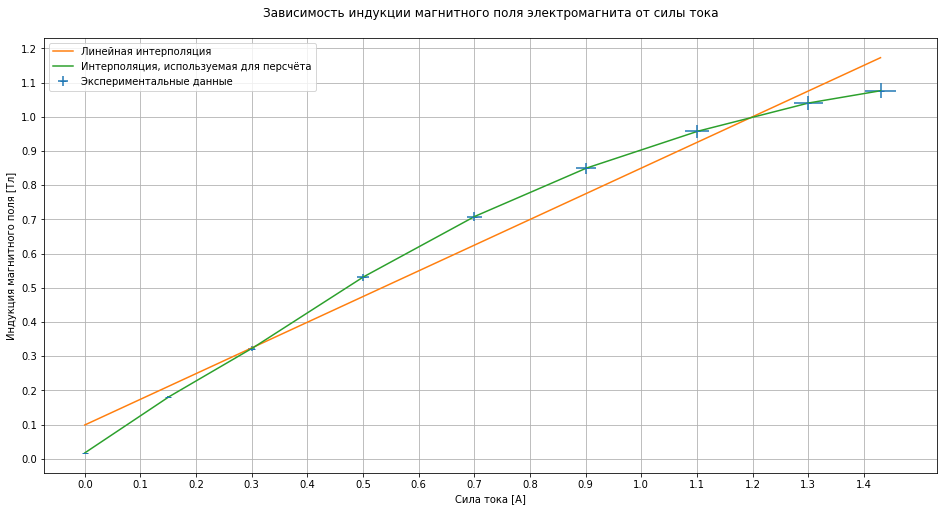

In [571]:
xLine = np.linspace(min(data_magnet.I),max(data_magnet.I),1000)
yLine = MNK_magnet_data.slope*xLine+MNK_magnet_data.intercept
yInterp = MagnetDataInterp(xLine)

fig,ax = plt.subplots(figsize = (16,8))
plt.errorbar(data_magnet['I'].to_numpy(),
            data_magnet['B'].to_numpy(),
            xerr = 0.02*data_magnet['I'].to_numpy(),
            yerr = 0.02*data_magnet['B'].to_numpy(),
            fmt='_',
            label = 'Экспериментальные данные')
plt.plot(xLine,yLine,label = r'Линейная интерполяция')
plt.plot(xLine,yInterp,label = r'Интерполяция, используемая для персчёта')

plt.legend()
plt.xlabel(r'Сила тока [А]')
plt.ylabel(r'Индукция магнитного поля [Тл]')
plt.grid()
plt.xticks(np.arange(0,1.5,0.1))
plt.yticks(np.arange(0,1.3,0.1))
plt.title("Зависимость индукции магнитного поля электромагнита от силы тока\n")
plt.show()


### Рассчёт ЭДС Холла

In [572]:
#данные полученные в работе
data = pd.read_csv("data.csv")
data

,I_2,I,U
0,0.30,0.00,-0.060
1,0.30,0.20,-0.085
2,0.30,0.40,-0.110
3,0.30,0.60,-0.133
4,0.30,0.80,-0.150
5,0.30,1.00,-0.165
6,0.30,1.20,-0.175
7,0.30,1.43,-0.182
8,0.40,0.00,-0.086
9,0.40,0.20,-0.122


In [573]:
#переведем значения в си
data['U']*=np.power(0.1,3)
data['I_2']*=np.power(0.1,3)
data

,I_2,I,U
0,0.00030,0.00,-0.000060
1,0.00030,0.20,-0.000085
2,0.00030,0.40,-0.000110
3,0.00030,0.60,-0.000133
4,0.00030,0.80,-0.000150
5,0.00030,1.00,-0.000165
6,0.00030,1.20,-0.000175
7,0.00030,1.43,-0.000182
8,0.00040,0.00,-0.000086
9,0.00040,0.20,-0.000122


In [574]:
dfi.export(data,'data.png')

##### Данные на графике и линейные интерполяции

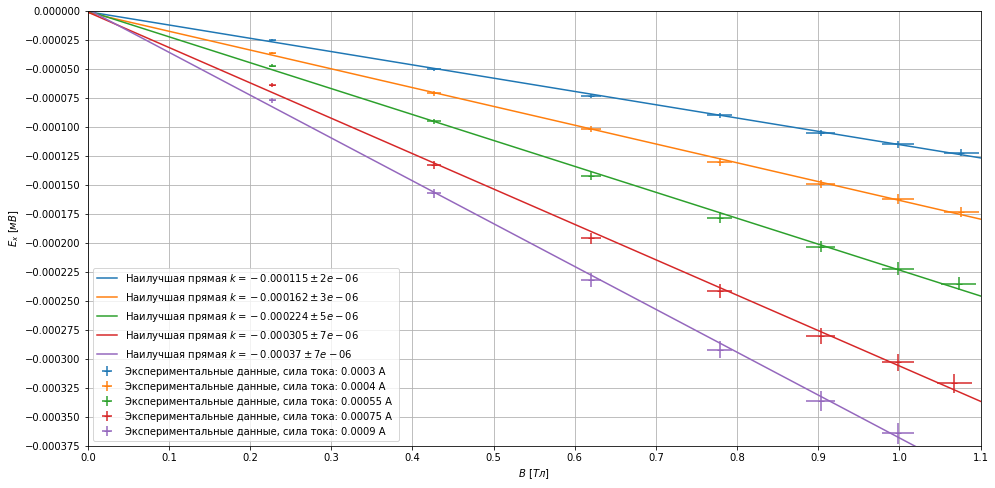

In [575]:
fig,ax = plt.subplots(figsize = (16,8))
MNK,xLine = [],np.linspace(0,1.5,1000)
for current in np.unique(data['I_2'].to_numpy()):
    xData = MagnetDataInterp(data[(abs(current - data.I_2)<0.0001)]['I'].to_numpy()[1::])
    yData = data[(abs(current - data.I_2)<0.00001)]['U'].to_numpy()[1::]-data[(abs(current - data.I_2)<0.00001)]['U'].to_numpy()[0]
    MNK.append(linregress(xData,yData))
    yLine = MNK[-1].slope*xLine+MNK[-1].intercept
    p = plt.errorbar(xData,yData,
                xerr = 0.02*xData,
                yerr = 0.025*yData,
                fmt = '_',
                label = 'Экспериментальные данные, cила тока: '+str(round(current,5))+' А ')
    plt.plot(xLine,
            yLine,
            color = p[0].get_color(),
            label = r'Наилучшая прямая $k = '+str(round(MNK[-1].slope,6))+' \pm '+str(round(MNK[-1].stderr,6))+'$')
    
plt.xlim((0,1.1))
plt.ylim((-0.00035,0))
plt.xticks(np.arange(0,1.2,0.1))
plt.yticks(np.arange(0,-0.4,-0.025)*np.power(0.1,3))
plt.xlabel(r"$B \ [Тл]$")
plt.ylabel(r"$E_{x} \ [мВ]$")
plt.legend(fontsize=10,loc = 'lower left')
plt.grid() 
plt.show()

##### График $k(I)$

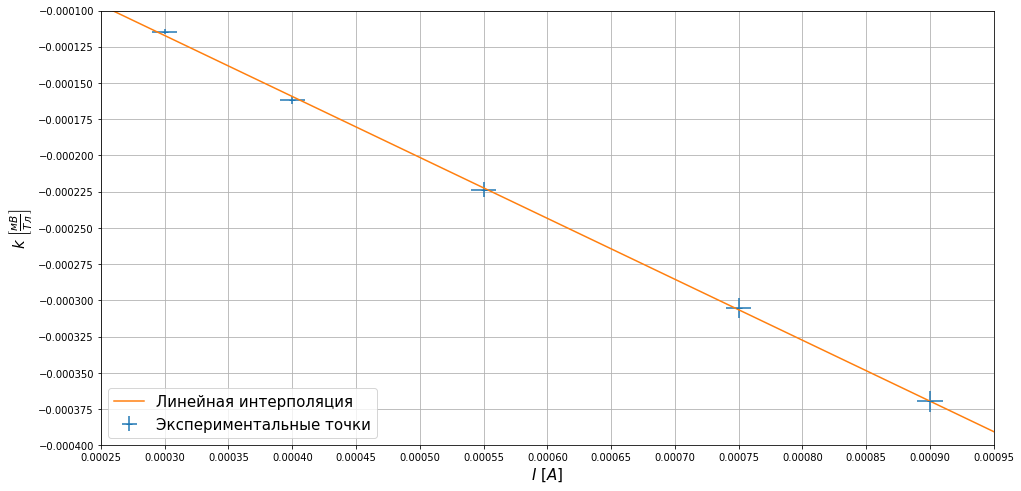

In [576]:
MNK_K_I = linregress(np.unique(data['I_2'].to_numpy()),[a.slope for a in MNK])
xLine = np.linspace(0.00025,0.00095,1000)
yLine = MNK_K_I.slope*xLine+MNK_K_I.intercept
fig,ax = plt.subplots(figsize = (16,8))
plt.errorbar(x = np.unique(data['I_2'].to_numpy()),
            xerr = [0.01*np.power(0.1,3)]*len(np.unique(data['I_2'].to_numpy())),
            y = [a.slope for a in MNK],
            yerr = [a.stderr for a in MNK],
            fmt = '_',
            label = 'Экспериментальные точки')
plt.plot(xLine,yLine,label = 'Линейная интерполяция')
plt.grid()
plt.xticks(np.arange(2.5,10,0.5)*np.power(0.1,4))
plt.xlabel(r'$ I  \ [А] $',fontsize = 15)
plt.ylabel(r'$ k \ \left[\frac{мВ}{Тл}\right] $',fontsize = 15)
plt.legend(loc = 'lower left',fontsize = 15)
plt.yticks(np.arange(-4,-0.5,0.25)*np.power(0.1,4))
plt.xlim(0.00025,0.00095)
plt.ylim((-0.0004,-0.0001))
plt.show()

In [577]:
printLineCoefficients(MNK_K_I)

Коэффициент a: -0.42037428065597104 +/- 0.004902373627648493
Коэффициент b: 8.850473081021025e-06 +/- 3.0418428404915055e-06


In [578]:
a_n = (2.2*np.power(0.1,3)) #a - ширина пластинки
L_n = (620*np.power(0.1,3)) 
I_n = 7*np.power(0.1,3)

In [581]:
Rx_n = (-1)*MNK_K_I.slope*a_n
RxError_n = abs(MNK_K_I.stderr*a_n)
print("Значение Rн: "+str(Rx_n*np.power(10,6))+" +/- "+str(RxError_n*np.power(10,6))+" 10^(-6)")
print("Погрешность в процентах: "+str(round(abs(100*RxError_n/Rx_n),2))+"%")

Значение Rн: 924.8234174431366 +/- 0.01078522198082669 10^(-6)
Погрешность в процентах: 0.0%


### Остальное

##### Вычисление концетрации носителей

In [580]:
n_n = 1/(Rx_n*scipy.constants.e)
nError_n = n_n*RxError_n/Rx_n
print("Значение концентрации: "+str(n_n)+" +/- "+str(nError_n))

Значение концентрации: 6.748865736679433e+18 +/- 78704770787.6175
